In [10]:
from pathlib import Path
from cobra.io import load_matlab_model, save_matlab_model,save_json_model
import logging
import cobra
from cobra.io import load_model
import pandas as pd

In [11]:
# abbreviate_amino_acids=['EX_Ala_',
#  'EX_Arg_',
#  'EX_Asn_',
#  'EX_Asp_',
#  'EX_Cys_',
#  'EX_Gln_',
#  'EX_Glu_',
#  'EX_Gly_',
#  'EX_gly_',
#  'EX_His_',
#  'EX_Ile_',
#  'EX_Leu_',
#  'EX_Lys_',
#  'EX_Met_',
#  'EX_Phe_',
#  'EX_Pro_',
#  'EX_Ser_',
#  'EX_Thr_',
#  'EX_Trp_',
#  'EX_Tyr_',
#  'EX_Val_']

abbreviate_amino_acids=[
 'EX_Cys_',
 'EX_Met_',
]

def find_amino_acids(substrates):
    '''
    Find all amino acids from medium
    '''
    return [s for s in substrates if any(substring.lower() in s.lower() for substring in abbreviate_amino_acids)]

In [12]:
ecoli_model = load_matlab_model(
        "C:\\Users\\lenovo\\Desktop\\escher_2\\iJO1366.mat"
    )

This model seems to have metCharge instead of metCharges field. Will use metCharge for what metCharges represents.
No defined compartments in model iJO1366. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, p


In [13]:
reaction_id = []
for i in range(len(ecoli_model.reactions)):
    reaction_id.append(ecoli_model.reactions[i].id)

amino_reaction_id = sorted(find_amino_acids(reaction_id))

amino_reaction_id

['EX_cys__D_e', 'EX_cys__L_e', 'EX_met__D_e', 'EX_met__L_e']

In [14]:
medium = list(ecoli_model.medium.keys())
M9_id = []
x=[3,4,7,8,10,12,14,15,16,20] # 8 is nh4; 1 is glucose; 15 is so4
for i in range(len(medium)):
    if i in x:
        M9_id.append(medium[i])
    
M9_id


['EX_h_e',
 'EX_h2o_e',
 'EX_mg2_e',
 'EX_mn2_e',
 'EX_na1_e',
 'EX_ca2_e',
 'EX_ni2_e',
 'EX_o2_e',
 'EX_cl_e',
 'EX_slnt_e']

# Simulation

In [16]:
with ecoli_model:
    '''
    Set the M9 medium environment
    M9.bound (-18.5, 100)
    else.bound (0, 100)
    '''
    
    for id in medium:
        if id in M9_id:
            ecoli_model.reactions.get_by_id(id).lower_bound = -18.5
            ecoli_model.reactions.get_by_id(id).upper_bound = 100
        else:
            ecoli_model.reactions.get_by_id(id).lower_bound = -0.0076 # 充分硫和其它物质下0.0076达到m9
            ecoli_model.reactions.get_by_id(id).upper_bound = 100
        # if id == 'EX_glc__D_e'  or id =='EX_so4_e':
        if id == 'EX_so4_e':
            ecoli_model.reactions.get_by_id(id).lower_bound = -0
            ecoli_model.reactions.get_by_id(id).upper_bound = 100
    
    
    
    result_conc = []
    concentration = [1*i for i in range(0, 40)]
    for id in amino_reaction_id:
        sub_conc = []
        for conc in concentration:
            with ecoli_model:
                ecoli_model.reactions.get_by_id(id).lower_bound = -conc
                ecoli_model.reactions.get_by_id(id).upper_bound = 100
                result_value = ecoli_model.optimize().objective_value

                print(result_value, id, conc, ecoli_model.optimize().status)
                result_fluxes = ecoli_model.optimize().fluxes
                result_fluxes = pd.Series(result_fluxes)
                #result_summary = ecoli_model.summary()
                #result_fluxes.to_csv('.\\result_fluxes\\without_nh4\\' + id + '_' + str(conc) + '.csv', header=False)
                sub_conc.append(result_value)
        result_conc.append(sub_conc)
    
    
    # ecoli_model.reactions.get_by_id('EX_met__L_e').lower_bound = -0.1
    # ecoli_model.reactions.get_by_id('EX_met__L_e').upper_bound = 100

    # ecoli_model.reactions.get_by_id('EX_cys__L_e').lower_bound = -60
    # ecoli_model.reactions.get_by_id('EX_cys__L_e').upper_bound = 100

    # result_value = ecoli_model.optimize().objective_value
    # resullt_fluxes = ecoli_model.optimize().fluxes
    # result_summary = ecoli_model.summary()

d:\Anaconda\envs\myescher\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


0.0 EX_cys__D_e 0 infeasible
0.007878660337478286 EX_cys__D_e 1 optimal
0.00787866033747389 EX_cys__D_e 2 optimal
0.00787866033747389 EX_cys__D_e 3 optimal
0.00787866033747389 EX_cys__D_e 4 optimal
0.00787866033747389 EX_cys__D_e 5 optimal
0.00787866033747389 EX_cys__D_e 6 optimal
0.00787866033747389 EX_cys__D_e 7 optimal
0.00787866033747389 EX_cys__D_e 8 optimal
0.00787866033747389 EX_cys__D_e 9 optimal
0.00787866033747389 EX_cys__D_e 10 optimal
0.00787866033747389 EX_cys__D_e 11 optimal
0.00787866033747389 EX_cys__D_e 12 optimal
0.00787866033747389 EX_cys__D_e 13 optimal
0.00787866033747389 EX_cys__D_e 14 optimal
0.00787866033747389 EX_cys__D_e 15 optimal
0.00787866033747389 EX_cys__D_e 16 optimal
0.00787866033747389 EX_cys__D_e 17 optimal
0.00787866033747389 EX_cys__D_e 18 optimal
0.00787866033747389 EX_cys__D_e 19 optimal
0.00787866033747389 EX_cys__D_e 20 optimal
0.00787866033747389 EX_cys__D_e 21 optimal
0.00787866033747389 EX_cys__D_e 22 optimal
0.00787866033747389 EX_cys__D_e 2

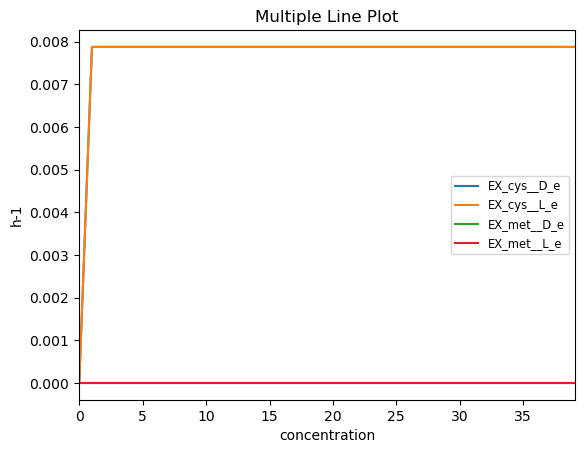

In [17]:
import matplotlib.pyplot as plt
import numpy as np


for i in range(len(result_conc)):   
    plt.plot(concentration, result_conc[i],label=amino_reaction_id[i])

plt.xlabel('concentration')
plt.ylabel('h-1')
#plt.xscale('log')
plt.xlim(-0.01, concentration[-1]+0.1)
plt.title('Multiple Line Plot')
plt.legend(fontsize='small')
plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# data = {}
# for i in range(len(amino_reaction_id)):
#     data[amino_reaction_id[i]] = result_conc[i]

# # 创建 DataFrame 对象
# df = pd.DataFrame(data)
# df.insert(0,"concentration",concentration)
# # 保存到 Excel 文件
# df.to_csv('sulfur_some.csv', index=False)
